## Load the data listings for houses 

In [1]:
import pandas as pd
import copy
listings_file_path ='C:\\Users\\xiao\\Documents\\listings.csv' 
listings = pd.read_csv(listings_file_path)
listings.columns

c:\users\xiao\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [2]:
# NLTK may be used later
listings['description']

0        Beautiful, spacious skylit studio in the heart...
1        Enjoy 500 s.f. top floor in 1899 brownstone, w...
2        <b>The space</b><br />HELLO EVERYONE AND THANK...
3        We welcome you to stay in our lovely 2 br dupl...
4        Please don’t expect the luxury here just a bas...
                               ...                        
37708    $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...
37709    $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...
37710    Newly renovated townhouse in Bushwick, includi...
37711    $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...
37712    $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...
Name: description, Length: 37713, dtype: object

In [3]:
useless = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','description', 
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price','calendar_last_scraped','license','calendar_updated','id']

remained = list(set(list(listings.columns))-set(useless))
new_data = copy.deepcopy(listings[remained])
new_data.drop(new_data.filter(regex = 'review').columns, axis = 1, inplace = True)

In [4]:
new_data.dtypes

maximum_minimum_nights                          float64
host_identity_verified                           object
bedrooms                                        float64
maximum_maximum_nights                          float64
minimum_nights                                    int64
neighborhood_overview                            object
neighbourhood_cleansed                           object
calculated_host_listings_count_shared_rooms       int64
availability_60                                   int64
host_response_rate                               object
host_total_listings_count                       float64
property_type                                    object
host_response_time                               object
availability_90                                   int64
beds                                            float64
neighbourhood_group_cleansed                     object
has_availability                                 object
host_about                                      

## Check Missing Data

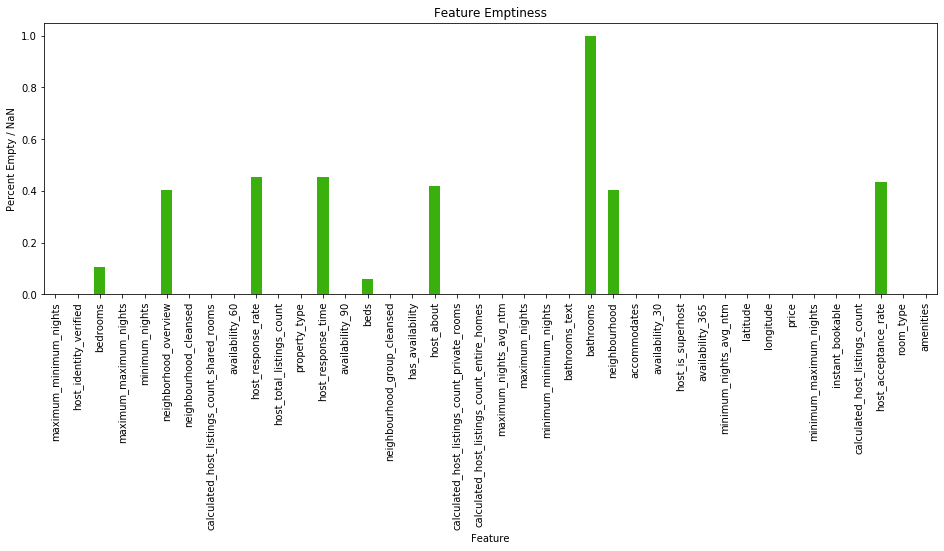

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

percentage_missing_data = new_data.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#39B00C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [6]:
kick_1 = ['bathrooms','neighborhood_overview','host_response_rate','host_about',
          'host_response_time','host_acceptance_rate','neighbourhood']
new_data.drop(kick_1,axis=1,inplace=True)

### Check Sparse Categorical Features

In [7]:
new_data.columns[new_data.dtypes == 'object']

Index(['host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'neighbourhood_group_cleansed', 'has_availability', 'bathrooms_text',
       'host_is_superhost', 'price', 'instant_bookable', 'room_type',
       'amenities'],
      dtype='object')

In [8]:
new_data['neighbourhood_group_cleansed'].value_counts()

Manhattan        16625
Brooklyn         14512
Queens            5178
Bronx             1059
Staten Island      339
Name: neighbourhood_group_cleansed, dtype: int64

In [9]:
new_data['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    2724
Williamsburg          2596
Harlem                1960
Hell's Kitchen        1678
Bushwick              1674
                      ... 
Graniteville             1
Neponsit                 1
Woodrow                  1
Castle Hill              1
Country Club             1
Name: neighbourhood_cleansed, Length: 222, dtype: int64

In [10]:
new_data['property_type'].value_counts()

Entire rental unit                  15794
Private room in rental unit         11591
Private room in residential home     1930
Private room in townhouse            1154
Entire residential home              1128
                                    ...  
Bus                                     1
Lighthouse                              1
Private room in farm stay               1
Tent                                    1
Shared room in casa particular          1
Name: property_type, Length: 79, dtype: int64

In [11]:
new_data['room_type'].value_counts()

Entire home/apt    20063
Private room       16828
Shared room          576
Hotel room           246
Name: room_type, dtype: int64

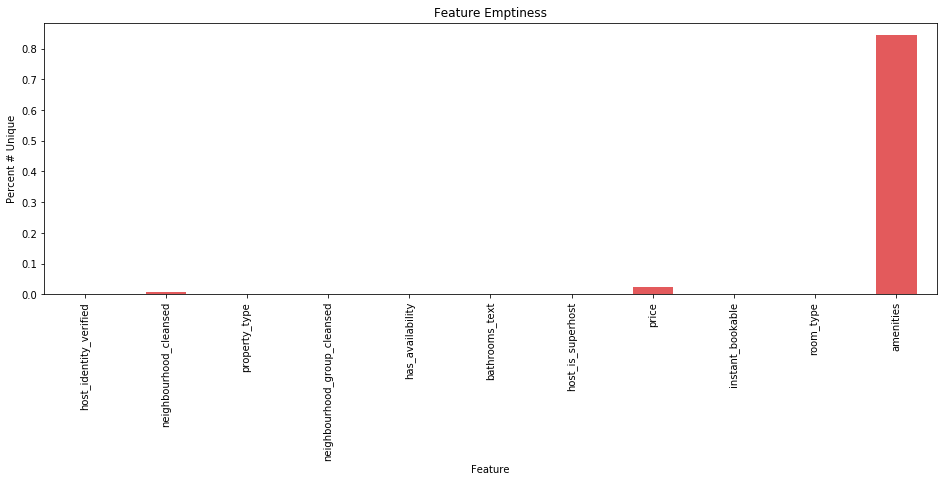

In [12]:
categories = new_data.columns[new_data.dtypes == 'object']
percentage_unique = new_data[categories].nunique() / new_data.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

From previous analysis, we could kick 'property_type' and 'amenities'.

In [13]:
kick_2 = ['property_type','amenities']
new_data.drop(kick_2,axis=1,inplace=True)

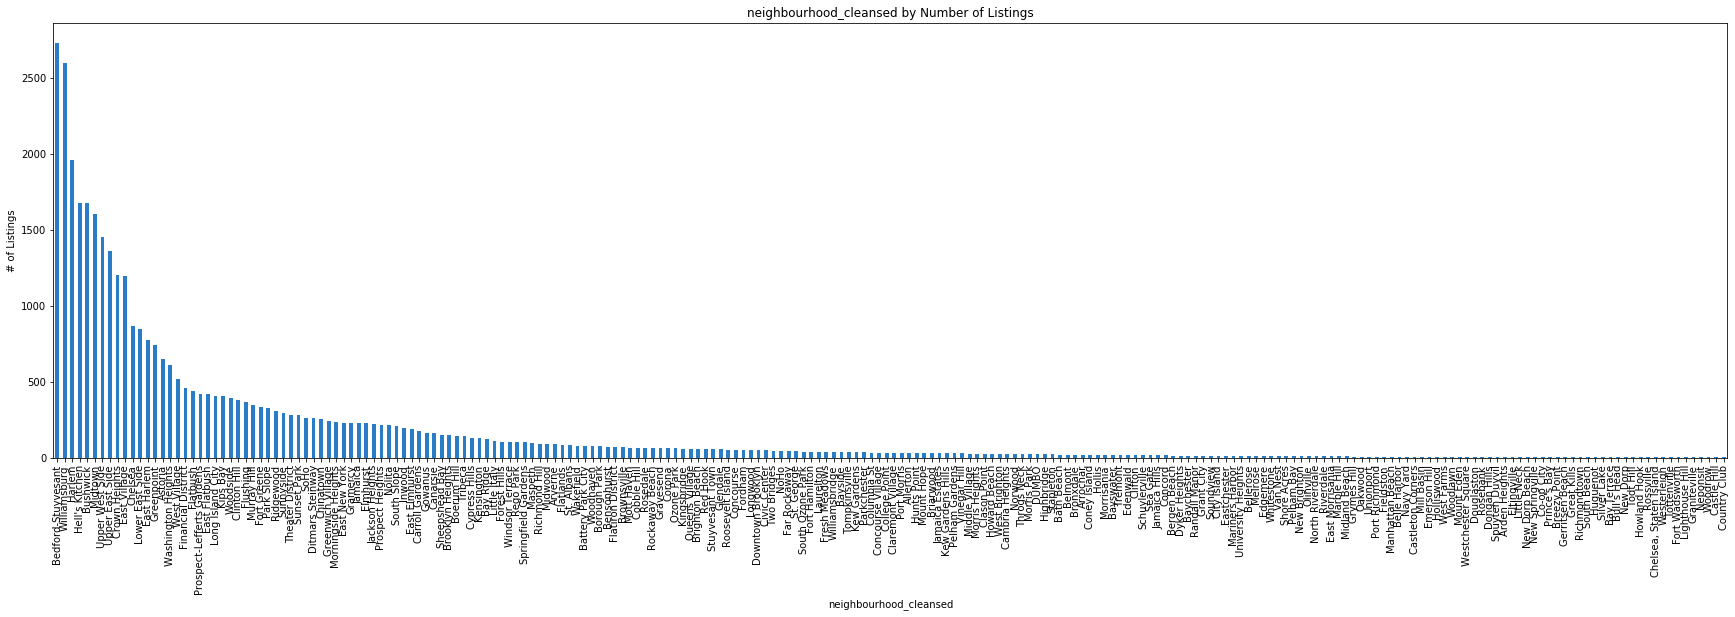

In [14]:
# we could see there are too many classes in 'neighbourhood_cleansed'
count_per_neighbourhood_cleansed = new_data['neighbourhood_cleansed'].value_counts()
ax = count_per_neighbourhood_cleansed.plot(kind='bar', figsize = (30,8), color = '#0465BC', alpha = 0.85)
ax.set_title("neighbourhood_cleansed by Number of Listings")
ax.set_xlabel("neighbourhood_cleansed")
ax.set_ylabel("# of Listings")
plt.show()

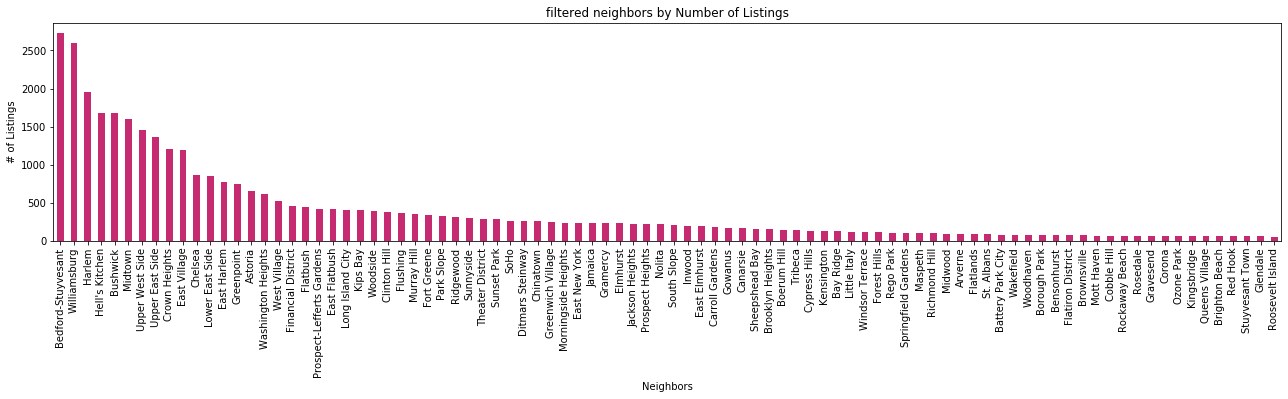

Number of entries removed:  2149


In [16]:
# We could choose those with count >=50
filtered_neighbourhood_cleansed = count_per_neighbourhood_cleansed[count_per_neighbourhood_cleansed > 50].index
listings_neighbor_filtered = new_data[new_data['neighbourhood_cleansed'].isin(filtered_neighbourhood_cleansed)]

# Plot new zipcodes distribution
count_per_neighbor = listings_neighbor_filtered['neighbourhood_cleansed'].value_counts()
ax = count_per_neighbor.plot(kind='bar', figsize = (22,4), color = '#BC0457', alpha = 0.85)
ax.set_title("filtered neighbors by Number of Listings")
ax.set_xlabel("Neighbors")
ax.set_ylabel("# of Listings")
plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_neighbor_filtered.shape[0])

### We would use data with 'neighbourhood_cleansed' and without.

(29943, 31)


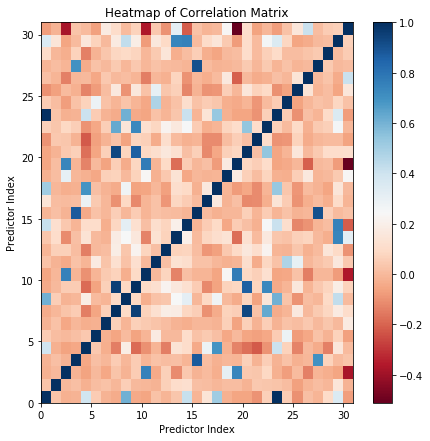

In [17]:
# Plot correlation matrix plot
import numpy as np
from sklearn import preprocessing

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = copy.deepcopy(listings_neighbor_filtered)
# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)
print(temp_data.shape)
# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [22]:
# do some adjust with those too much collinearity
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
pd.set_option('display.max_rows',100)
sorted_pairs[sorted_pairs >= 0.4]

minimum_nights_avg_ntm                        minimum_nights                                  0.404138
minimum_nights                                minimum_nights_avg_ntm                          0.404138
room_type                                     price                                           0.411440
price                                         room_type                                       0.411440
minimum_nights_avg_ntm                        calculated_host_listings_count_entire_homes     0.415566
calculated_host_listings_count_entire_homes   minimum_nights_avg_ntm                          0.415566
maximum_minimum_nights                        calculated_host_listings_count_entire_homes     0.417882
calculated_host_listings_count_entire_homes   maximum_minimum_nights                          0.417882
calculated_host_listings_count                host_total_listings_count                       0.432708
host_total_listings_count                     calculated_host_listings_co

In [20]:
sorted_pairs[sorted_pairs <= -0.3]

accommodates  room_type      -0.510904
room_type     accommodates   -0.510904
              bedrooms       -0.376862
bedrooms      room_type      -0.376862
room_type     beds           -0.364305
beds          room_type      -0.364305
dtype: float64

In [24]:
useless = ['minimum_nights','longitude','latitude','beds','calculated_host_listings_count', 
           'availability_30', 'availability_60', 'availability_90','room_type','maximum_minimum_nights','minimum_maximum_nights','minimum_minimum_nights','maximum_maximum_nights']
listings_wt_neighbor_processed = listings_neighbor_filtered.drop(useless, axis=1)
listings_wt_neighbor_processed.columns


Index(['host_identity_verified', 'bedrooms', 'neighbourhood_cleansed',
       'calculated_host_listings_count_shared_rooms',
       'host_total_listings_count', 'neighbourhood_group_cleansed',
       'has_availability', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_entire_homes', 'maximum_nights_avg_ntm',
       'maximum_nights', 'bathrooms_text', 'accommodates', 'host_is_superhost',
       'availability_365', 'minimum_nights_avg_ntm', 'price',
       'instant_bookable'],
      dtype='object')

In [25]:
listings_wt_neighbor_processed.dtypes

host_identity_verified                           object
bedrooms                                        float64
neighbourhood_cleansed                           object
calculated_host_listings_count_shared_rooms       int64
host_total_listings_count                       float64
neighbourhood_group_cleansed                     object
has_availability                                 object
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_entire_homes       int64
maximum_nights_avg_ntm                          float64
maximum_nights                                    int64
bathrooms_text                                   object
accommodates                                      int64
host_is_superhost                                object
availability_365                                  int64
minimum_nights_avg_ntm                          float64
price                                            object
instant_bookable                                

In [26]:
final_data = copy.deepcopy(listings_wt_neighbor_processed)
final_data['price'] = final_data['price'].str.replace('\$|,', '')
final_data['price'] = pd.to_numeric(final_data['price'])
final_data['bathrooms'] = final_data['bathrooms_text'].str.extract('(\d+\.?\d*)')
final_data['bathrooms'] = pd.to_numeric(final_data['bathrooms'])
useless = ['bathrooms_text']
final_data.drop(useless, axis=1,inplace=True)

In [27]:
final_data.dtypes

host_identity_verified                           object
bedrooms                                        float64
neighbourhood_cleansed                           object
calculated_host_listings_count_shared_rooms       int64
host_total_listings_count                       float64
neighbourhood_group_cleansed                     object
has_availability                                 object
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_entire_homes       int64
maximum_nights_avg_ntm                          float64
maximum_nights                                    int64
accommodates                                      int64
host_is_superhost                                object
availability_365                                  int64
minimum_nights_avg_ntm                          float64
price                                           float64
instant_bookable                                 object
bathrooms                                       

In [28]:
final_data.shape

(35564, 18)

In [29]:
final_data.to_csv('price_data_with_filtered_neighbors_NYC_11_30.csv',index=False)

### Now we repeated with no 'neighbourhood_cleansed'

In [31]:
useless = ['minimum_nights','longitude','latitude','beds','calculated_host_listings_count', 
           'availability_30', 'availability_60', 'availability_90','room_type','maximum_minimum_nights','minimum_maximum_nights','minimum_minimum_nights','maximum_maximum_nights']
new_data = new_data.drop(useless, axis=1)
new_data.columns

Index(['host_identity_verified', 'bedrooms', 'neighbourhood_cleansed',
       'calculated_host_listings_count_shared_rooms',
       'host_total_listings_count', 'neighbourhood_group_cleansed',
       'has_availability', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_entire_homes', 'maximum_nights_avg_ntm',
       'maximum_nights', 'bathrooms_text', 'accommodates', 'host_is_superhost',
       'availability_365', 'minimum_nights_avg_ntm', 'price',
       'instant_bookable'],
      dtype='object')

In [32]:
final_data = copy.deepcopy(new_data)
final_data['price'] = final_data['price'].str.replace('\$|,', '')
final_data['price'] = pd.to_numeric(final_data['price'])
final_data['bathrooms'] = final_data['bathrooms_text'].str.extract('(\d+\.?\d*)')
final_data['bathrooms'] = pd.to_numeric(final_data['bathrooms'])
useless = ['bathrooms_text']
final_data.drop(useless, axis=1,inplace=True)

In [33]:
final_data.dtypes

host_identity_verified                           object
bedrooms                                        float64
neighbourhood_cleansed                           object
calculated_host_listings_count_shared_rooms       int64
host_total_listings_count                       float64
neighbourhood_group_cleansed                     object
has_availability                                 object
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_entire_homes       int64
maximum_nights_avg_ntm                          float64
maximum_nights                                    int64
accommodates                                      int64
host_is_superhost                                object
availability_365                                  int64
minimum_nights_avg_ntm                          float64
price                                           float64
instant_bookable                                 object
bathrooms                                       

In [35]:
final_data.drop(['neighbourhood_cleansed'], axis=1,inplace=True)

In [36]:
final_data.shape

(37713, 17)

In [37]:
final_data.to_csv('price_data_wo_filtered_neighbors_NYC_11_30.csv',index=False)